### Pattern Recognition
### Assignment 4  
### COE19B007 - Praveen B R
#### Question 4

**Q4.)
From the iris dataset, choose the ’petallength’, ’sepalwidth’ for setosa, versicolor and virginica flowers.  Learna decision boundary for the two features using asingle perceptron and SVM. Assume that all the weightsof the perceptron are initialized as 0 with the learning rate of 0.01.  Draw the decision boundary**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cvxopt import matrix, solvers
from sympy import *

In [4]:
iris_dataset = pd.read_csv("data/Iris.csv",index_col=False)
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data = iris_dataset.drop(['SepalLengthCm','PetalWidthCm'], axis=1)
print(iris_data)

      Id  SepalWidthCm  PetalLengthCm         Species
0      1           3.5            1.4     Iris-setosa
1      2           3.0            1.4     Iris-setosa
2      3           3.2            1.3     Iris-setosa
3      4           3.1            1.5     Iris-setosa
4      5           3.6            1.4     Iris-setosa
..   ...           ...            ...             ...
145  146           3.0            5.2  Iris-virginica
146  147           2.5            5.0  Iris-virginica
147  148           3.0            5.2  Iris-virginica
148  149           3.4            5.4  Iris-virginica
149  150           3.0            5.1  Iris-virginica

[150 rows x 4 columns]


In [18]:
iris_data_12 = iris_data[iris_data['Species']!='Iris-virginica']
iris_data_13 = iris_data[iris_data['Species']!='Iris-versicolor']
iris_data_23 = iris_data[iris_data['Species']!='Iris-setosa']
print(iris_data_12, iris_data_13, iris_data_23)

     Id  SepalWidthCm  PetalLengthCm          Species
0     1           3.5            1.4      Iris-setosa
1     2           3.0            1.4      Iris-setosa
2     3           3.2            1.3      Iris-setosa
3     4           3.1            1.5      Iris-setosa
4     5           3.6            1.4      Iris-setosa
..  ...           ...            ...              ...
95   96           3.0            4.2  Iris-versicolor
96   97           2.9            4.2  Iris-versicolor
97   98           2.9            4.3  Iris-versicolor
98   99           2.5            3.0  Iris-versicolor
99  100           2.8            4.1  Iris-versicolor

[100 rows x 4 columns]       Id  SepalWidthCm  PetalLengthCm         Species
0      1           3.5            1.4     Iris-setosa
1      2           3.0            1.4     Iris-setosa
2      3           3.2            1.3     Iris-setosa
3      4           3.1            1.5     Iris-setosa
4      5           3.6            1.4     Iris-setosa
..  

In [19]:
var=[]
for i in range(len(iris_data_12)):
    if iris_data_12['Species'].iloc[i]=='Iris-setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_12['var'] = var
iris_data_12 = iris_data_12.drop(['Species'],axis=1)
print(iris_data_12)

     Id  SepalWidthCm  PetalLengthCm  var
0     1           3.5            1.4    1
1     2           3.0            1.4    1
2     3           3.2            1.3    1
3     4           3.1            1.5    1
4     5           3.6            1.4    1
..  ...           ...            ...  ...
95   96           3.0            4.2   -1
96   97           2.9            4.2   -1
97   98           2.9            4.3   -1
98   99           2.5            3.0   -1
99  100           2.8            4.1   -1

[100 rows x 4 columns]


/tmp/ipykernel_15378/56341886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_12['var'] = var


In [20]:
var=[]
for i in range(len(iris_data_13)):
    if iris_data_13['Species'].iloc[i]=='Iris-setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_13['var'] = var
iris_data_13 = iris_data_13.drop(['Species'],axis=1)
print(iris_data_13)

      Id  SepalWidthCm  PetalLengthCm  var
0      1           3.5            1.4    1
1      2           3.0            1.4    1
2      3           3.2            1.3    1
3      4           3.1            1.5    1
4      5           3.6            1.4    1
..   ...           ...            ...  ...
145  146           3.0            5.2   -1
146  147           2.5            5.0   -1
147  148           3.0            5.2   -1
148  149           3.4            5.4   -1
149  150           3.0            5.1   -1

[100 rows x 4 columns]


/tmp/ipykernel_15378/65265603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_13['var'] = var


In [21]:
var=[]
for i in range(len(iris_data_23)):
    if iris_data_23['Species'].iloc[i]=='Iris-versicolor':
        var.append(1)
    else:
        var.append(-1)
iris_data_23['var'] = var
iris_data_23 = iris_data_23.drop(['Species'],axis=1)
print(iris_data_23)

      Id  SepalWidthCm  PetalLengthCm  var
50    51           3.2            4.7    1
51    52           3.2            4.5    1
52    53           3.1            4.9    1
53    54           2.3            4.0    1
54    55           2.8            4.6    1
..   ...           ...            ...  ...
145  146           3.0            5.2   -1
146  147           2.5            5.0   -1
147  148           3.0            5.2   -1
148  149           3.4            5.4   -1
149  150           3.0            5.1   -1

[100 rows x 4 columns]


/tmp/ipykernel_15378/327251950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_23['var'] = var


####  Perceptron

In [23]:
data_aug_12 = pd.DataFrame(list(zip(iris_data_12['PetalLengthCm'],iris_data_12['SepalWidthCm'], [1 for i in range(len(iris_data_12))],iris_data_12['var'])), columns=['PetalLengthCm','SepalWidthCm','augment','var'])

In [24]:
data_aug_13 = pd.DataFrame(list(zip(iris_data_13['PetalLengthCm'],iris_data_13['SepalWidthCm'], [1 for i in range(len(iris_data_13))],iris_data_13['var'])), columns=['PetalLengthCm','SepalWidthCm','augment','var'])

In [27]:
data_aug_23 = pd.DataFrame(list(zip(iris_data_23['PetalLengthCm'],iris_data_23['SepalWidthCm'], [1 for i in range(len(iris_data_23))],iris_data_23['var'])), columns=['PetalLengthCm','SepalWidthCm','augment','var'])

**Splitting Features and Labels**

In [31]:
def split(data_aug):
    data_up = data_aug.copy()
    for i in range(len(data_up)):
        if(data_up['var'][i] == 1):
            data_up['PetalLengthCm'][i] = - data_up['PetalLengthCm'][i]
            data_up['SepalWidthCm'][i] = -data_up['SepalWidthCm'][i]
            data_up['augment'][i] = -data_up['augment'][i]
    # print(data_up)
    data_up = data_up.drop(['var'], axis=1)
    data_up = np.array(data_up)
    # print(data_up)

    labels = data_aug['var']
    labels = np.array(labels)
    # print(labels)

    return (data_up, labels)

In [32]:
data_up_12, labels_12 = split(data_aug_12) 
data_up_13, labels_13 = split(data_aug_13)
data_up_23, labels_23 = split(data_aug_23)


/tmp/ipykernel_15378/3272425608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['PetalLengthCm'][i] = - data_up['PetalLengthCm'][i]
/tmp/ipykernel_15378/3272425608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['SepalWidthCm'][i] = -data_up['SepalWidthCm'][i]
/tmp/ipykernel_15378/3272425608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['augment'][i] = -data_up['augment'][i]
/tmp/ipykernel_15378/32

In [36]:
def Perceptron_Train(data_up, labels, eta):
    
    threshold = 5000
    A = np.zeros(len(data_up[0]))

    # print(A)

    for epoch in range(threshold):
        ctr = 0
    
        for inp, label in zip(data_up, labels):
            summation = np.dot(inp, A)
            if summation <= 0:
                A += eta*inp
                ctr = 0

            else:
                ctr+=1
            
        if ctr == len(data_up):     #Until all input is correctly classified
            break
    print(epoch)
    return A


In [37]:
x1, x2, b = symbols('x1 x2 1')
P = np.array([x1,x2, b])
print(P)

[x1 x2 1]


In [38]:
eta = 0.01
A_12 = Perceptron_Train(data_up_12, labels_12, eta)
print(A_12)

3
[ 0.052 -0.041 -0.01 ]


In [39]:
Percep_equation_12 = np.dot(A_12.T, P)
print("Decision Boundary between Setosa and Versicolor: ", Percep_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -0.01*1 + 0.052*x1 - 0.041*x2  = 0


In [40]:
eta = 0.01
A_13 = Perceptron_Train(data_up_13, labels_13, eta)
print(A_13)

2
[ 0.032 -0.037 -0.01 ]


In [41]:
Percep_equation_13 = np.dot(A_13.T, P)
print("Decision Boundary between Setosa and Virginica: ", Percep_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.01*1 + 0.032*x1 - 0.037*x2  = 0


In [42]:
eta = 0.01
A_23 = Perceptron_Train(data_up_23, labels_23, eta)
print(A_23)

4999
[ 1.296 -0.837 -3.43 ]


In [43]:
Percep_equation_23 = np.dot(A_23.T, P)
print("Decision Boundary between Versicolor and Virginica: ", Percep_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  -3.42999999999997*1 + 1.29600000000016*x1 - 0.837*x2  = 0


Plotting the Decision Boundary

In [52]:
def plot_percep(A, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*A[0]/A[1] - A[2]/A[1]
    sns.lmplot(x='PetalLengthCm',y='SepalWidthCm', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

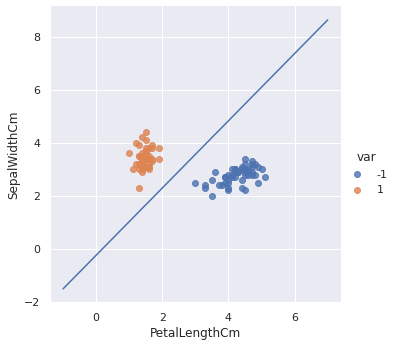

In [53]:
plot_percep(A_12,data_aug_12)

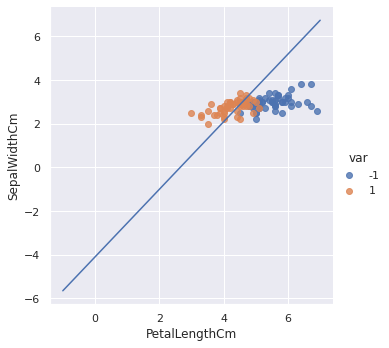

In [54]:
plot_percep(A_23,data_aug_23)

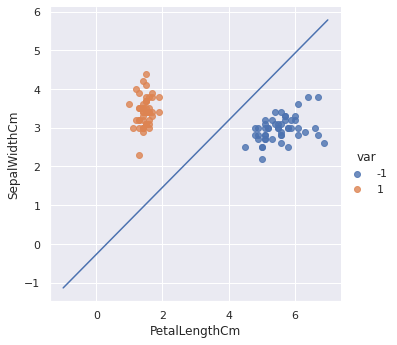

In [55]:
plot_percep(A_13, data_aug_13)

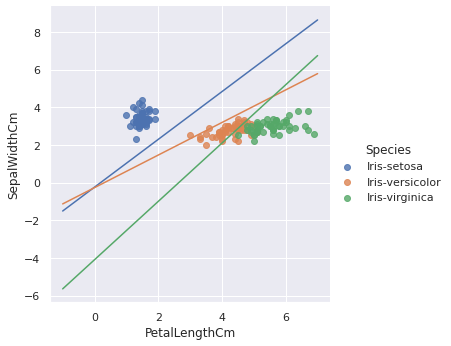

In [59]:
a = np.linspace(-1,7,100)
b_12 = -a*A_12[0]/A_12[1] - A_12[2]/A_12[1]
b_13 = -a*A_13[0]/A_13[1] - A_13[2]/A_13[1]
b_23 = -a*A_23[0]/A_23[1] - A_23[2]/A_23[1]

sns.lmplot(x='PetalLengthCm',y='SepalWidthCm', data=iris_data, fit_reg=False, hue='Species', legend=True)
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()

####  SVM

In [61]:
def data_svm_split(iris):
    X = iris[['PetalLengthCm','SepalWidthCm']]
    X = np.array(X)

    Y = iris['var']
    Y = np.array(Y).reshape(len(iris),1)

    return (X,Y)

In [62]:
X_12,Y_12 = data_svm_split(iris_data_12)
X_13,Y_13 = data_svm_split(iris_data_13)
X_23,Y_23 = data_svm_split(iris_data_23)

In [63]:
def SVM_Train(X,Y):
    m = len(X)
    P = matrix(np.multiply(np.dot(Y, Y.T), np.dot(X, X.T)))
    q = matrix(np.ones(m) * -1)
    g1 = np.asarray(np.diag(np.ones(m) * -1))
    
    print(np.array(g1).shape)
    h = matrix(np.zeros(m))
    A = np.reshape((Y.T), (1,m))
    b=[[0]]

    P = matrix(P,(m,m),'d') #dense
    A = matrix(A,(1,m),'d')
    g1 = matrix(g1,(m,m),'d')
    b = matrix(b,(1,1),'d')

    sol = solvers.qp(P, q, g1, h, A, b)
    alpha = np.array(sol['x'])
    ind = (alpha > 1e-4).flatten()
    print(ind)

    W = np.dot(np.transpose(alpha*Y),X)
    print(W)

    for i in range(m):
        if ind[i] == True:
            W0 = Y[i] - np.dot(X[i],W.T)
            print
            break

    print(W0)

    return (W, W0)

In [64]:
x1, x2 = symbols('x1 x2')
P_SVM = np.array([x1,x2])
print(P_SVM)

[x1 x2]


In [65]:
W_12,W0_12 = SVM_Train(X_12,Y_12)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -4.4149e+00 -8.2368e+00  3e+02  1e+01  2e+00
 1: -2.3919e+00 -2.5541e+00  2e+01  1e+00  2e-01
 2: -4.3905e-01 -1.7716e+00  2e+00  5e-02  6e-03
 3: -6.7500e-01 -1.0552e+00  5e-01  1e-02  1e-03
 4: -8.1447e-01 -1.1321e+00  4e-01  4e-03  5e-04
 5: -1.0065e+00 -1.0271e+00  2e-02  9e-05  1e-05
 6: -1.0251e+00 -1.0253e+00  2e-04  1e-06  1e-07
 7: -1.0253e+00 -1.0253e+00  2e-06  1e-08  1e-09
 8: -1.0253e+00 -1.0253e+00  2e-08  1e-10  1e-11
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False F

In [66]:
SVM_equation_12 = np.dot(W_12[0].T, P_SVM) + W0_12[0]
print("Decision Boundary between Setosa and Versicolor: ", SVM_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -1.2571428593549*x1 + 0.685714284475988*x2 + 1.05714286555595  = 0


In [67]:
W_13,W0_13 = SVM_Train(X_13,Y_13)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.3260e+00 -5.0008e+00  2e+02  2e+01  1e+00
 1: -1.5534e-01 -8.1749e-01  1e+01  9e-01  8e-02
 2:  1.9899e-02 -6.5370e-01  9e-01  1e-02  1e-03
 3: -1.5557e-01 -2.7963e-01  1e-01  7e-04  6e-05
 4: -2.2569e-01 -2.8991e-01  7e-02  1e-04  1e-05
 5: -2.5978e-01 -2.6459e-01  5e-03  1e-05  8e-07
 6: -2.6415e-01 -2.6421e-01  6e-05  1e-07  9e-09
 7: -2.6420e-01 -2.6420e-01  6e-07  1e-09  9e-11
 8: -2.6420e-01 -2.6420e-01  6e-09  1e-11  9e-13
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False F

In [68]:
SVM_equation_13 = np.dot(W_13[0].T, P_SVM) + W0_13[0]
print("Decision Boundary between Setosa and Virginica: ", SVM_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.686922063673952*x1 + 0.237780706899677*x2 + 1.49669751752161  = 0


In [69]:
W_23,W0_23 = SVM_Train(X_23,Y_23)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.7394e+01 -8.7261e+01  5e+02  2e+01  2e+00
 1: -1.0739e+02 -1.7754e+02  3e+02  1e+01  2e+00
 2: -5.7593e+02 -8.7585e+02  4e+02  1e+01  2e+00
 3: -1.9989e+03 -2.2838e+03  3e+02  1e+01  1e+00
 4: -6.2946e+03 -6.9640e+03  7e+02  1e+01  1e+00
 5: -3.5722e+04 -3.7828e+04  2e+03  1e+01  1e+00
 6: -1.6095e+05 -1.6859e+05  8e+03  1e+01  1e+00
 7: -2.7866e+06 -2.8210e+06  3e+04  9e+00  1e+00
 8: -1.2096e+08 -1.2168e+08  7e+05  9e+00  1e+00
 9: -1.7763e+10 -1.7777e+10  1e+07  9e+00  1e+00
10: -1.7815e+10 -1.7829e+10  1e+07  9e+00  1e+00
11: -1.7813e+10 -1.7827e+10  1e+07  9e+00  1e+00
12: -2.7428e+10 -2.7450e+10  2e+07  9e+00  1e+00
13: -3.1694e+10 -3.1719e+10  3e+07  9e+00  1e+00
14: -4.4785e+10 -4.4819e+10  3e+07  9e+00  1e+00
15: -7.3700e+10 -7.3747e+10  5e+07  9e+00  1e+00
16: -1.4174e+11 -1.4182e+11  8e+07  9e+00  1e+00
17: -1.8483e+11 -1.8493e+11  1e+08  9e+00  1e+00
Terminated (singular KKT matrix).
[ True  True  True  True 

In [70]:
SVM_equation_23 = np.dot(W_23[0].T, P_SVM) + W0_23[0]
print("Decision Boundary between Versicolor and Virginica: ", SVM_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  -0.0003662109375*x1 - 0.000213623046875*x2 + 1.00240478515625  = 0


In [72]:
def plot_SVM(W,W0, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*W[0][0]/W[0][1] - W0[0]/W[0][1]
    sns.lmplot(x='PetalLengthCm',y='SepalWidthCm', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

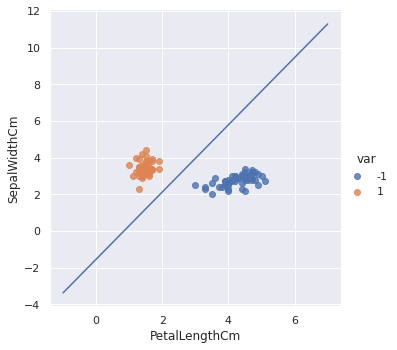

In [73]:
plot_SVM(W_12,W0_12,iris_data_12)

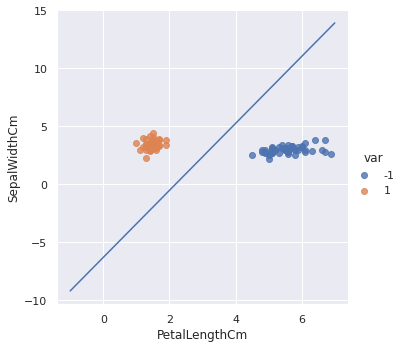

In [74]:
plot_SVM(W_13,W0_13,iris_data_13)

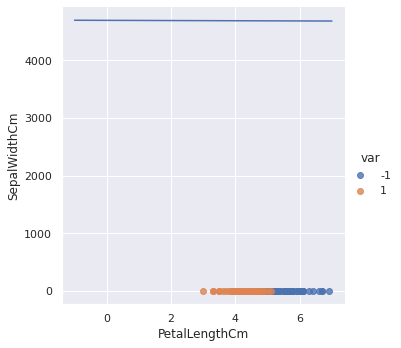

In [75]:
plot_SVM(W_23,W0_23,iris_data_23)

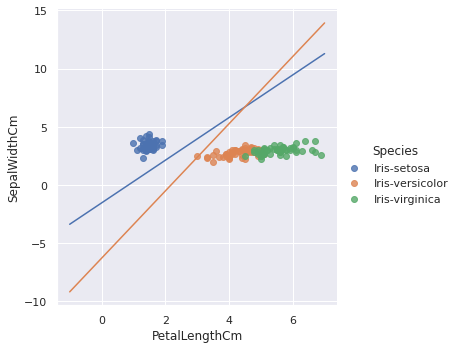

In [77]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='PetalLengthCm',y='SepalWidthCm', data=iris_data, fit_reg=False, hue='Species', legend=True)

plt.plot(a,b_12)
plt.plot(a,b_13)
plt.show()

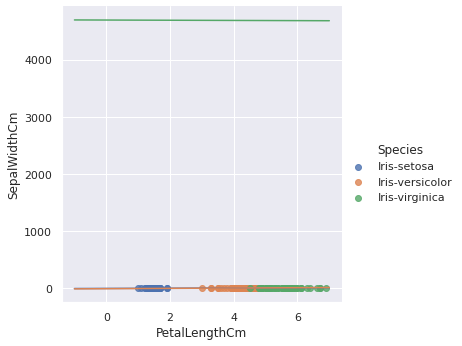

In [78]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
b_23 = -a*W_23[0][0]/W_23[0][1] - W0_23[0]/W_23[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='PetalLengthCm',y='SepalWidthCm', data=iris_data, fit_reg=False, hue='Species', legend=True)
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()